In [1]:
import time
import tqdm
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils
import torch.nn.init as init
from torch.autograd import Variable

In [2]:
pd.set_option('display.max_columns', None)  

In [3]:
mode = 'ROC'

In [4]:
f_rnd = pd.read_hdf("/data/t3home000/spark/QUASAR/preprocessing/nsubjettiness_massratio_rnd.h5")

In [43]:
f_rnd.columns

Index(['Mjj', 'Mj1', 'j1 tau1(b=.5)', 'j1 tau1(b=1)', 'j1 tau1(b=2)',
       'j1 tau2(b=.5)', 'j1 tau2(b=1)', 'j1 tau2(b=2)', 'j1 tau3(b=.5)',
       'j1 tau3(b=1)',
       ...
       'j2 tau15(b=2)', 'j2 n_trk', 'j2 pT1', 'j2 M_trim', 'j2 M_prun',
       'j2 M_mmdt', 'j2 M_sdb1', 'j2 M_sdb2', 'j2 M_sdm1', 'isSignal'],
      dtype='object', length=110)

In [44]:
f_rnd.head()

,Mjj,Mj1,j1 tau1(b=.5),j1 tau1(b=1),j1 tau1(b=2),j1 tau2(b=.5),j1 tau2(b=1),j1 tau2(b=2),j1 tau3(b=.5),j1 tau3(b=1),j1 tau3(b=2),j1 tau4(b=.5),j1 tau4(b=1),j1 tau4(b=2),j1 tau5(b=.5),j1 tau5(b=1),j1 tau5(b=2),j1 tau6(b=.5),j1 tau6(b=1),j1 tau6(b=2),j1 tau7(b=.5),j1 tau7(b=1),j1 tau7(b=2),j1 tau8(b=.5),j1 tau8(b=1),j1 tau8(b=2),j1 tau9(b=.5),j1 tau9(b=1),j1 tau9(b=2),j1 tau10(b=.5),j1 tau10(b=1),j1 tau10(b=2),j1 tau11(b=.5),j1 tau11(b=1),j1 tau11(b=2),j1 tau12(b=.5),j1 tau12(b=1),j1 tau12(b=2),j1 tau13(b=.5),j1 tau13(b=1),j1 tau13(b=2),j1 tau14(b=.5),j1 tau14(b=1),j1 tau14(b=2),j1 tau15(b=.5),j1 tau15(b=1),j1 tau15(b=2),j1 n_trk,j1 pT1,j1 M_trim,j1 M_prun,j1 M_mmdt,j1 M_sdb1,j1 M_sdb2,j1 M_sdm1,Mj2,j2 tau1(b=.5),j2 tau1(b=1),j2 tau1(b=2),j2 tau2(b=.5),j2 tau2(b=1),j2 tau2(b=2),j2 tau3(b=.5),j2 tau3(b=1),j2 tau3(b=2),j2 tau4(b=.5),j2 tau4(b=1),j2 tau4(b=2),j2 tau5(b=.5),j2 tau5(b=1),j2 tau5(b=2),j2 tau6(b=.5),j2 tau6(b=1),j2 tau6(b=2),j2 tau7(b=.5),j2 tau7(b=1),j2 tau7(b=2),j2 tau8(b=.5),j2 tau8(b=1),j2 tau8(b=2),j2 tau9(b=.5),j2 tau9(b=1),j2 tau9(b=2),j2 tau10(b=.5),j2 tau10(b=1),j2 tau10(b=2),j2 tau11(b=.5),j2 tau11(b=1),j2 tau11(b=2),j2 tau12(b=.5),j2 tau12(b=1),j2 tau12(b=2),j2 tau13(b=.5),j2 tau13(b=1),j2 tau13(b=2),j2 tau14(b=.5),j2 tau14(b=1),j2 tau14(b=2),j2 tau15(b=.5),j2 tau15(b=1),j2 tau15(b=2),j2 n_trk,j2 pT1,j2 M_trim,j2 M_prun,j2 M_mmdt,j2 M_sdb1,j2 M_sdb2,j2 M_sdm1,isSignal
0,2577.571899,-0.976388,0.053375,0.022677,0.009253,0.042518,0.011994,0.002307,0.038869,0.009455,0.001540,0.036818,0.008551,0.001134,0.034973,0.007539,0.000935,0.032600,0.006873,0.000862,0.031337,0.005978,0.000560,0.029866,0.005252,0.000403,0.025773,0.004795,0.000397,0.023779,0.004301,0.000355,0.022664,0.003934,0.000304,0.021504,0.003431,0.000236,0.018826,0.003034,0.000227,0.018095,0.002692,0.000176,0.017026,0.002449,0.000165,-1.077456,1285.895950,18.881765,9.797733,0.544032,9.797733,93.763971,0.000000,-0.766587,0.127546,0.027416,0.002702,0.085897,0.018330,0.001904,0.059073,0.013486,0.001823,0.052962,0.010191,0.001445,0.046031,0.008363,0.001147,0.038266,0.007411,0.001121,0.036563,0.006462,0.000956,0.031889,0.005595,0.000893,0.030376,0.005016,0.000746,0.027194,0.004287,0.000709,0.020380,0.003884,0.000707,0.019778,0.003271,0.000283,0.018775,0.002729,0.000082,0.017575,0.002384,0.000058,0.015273,0.002021,0.000051,-0.369270,1282.286017,42.162664,18.466533,18.466533,31.845136,42.162664,0.000000,0.0
1,3807.507389,2.563685,0.670141,0.490678,0.275638,0.331875,0.169591,0.060717,0.231046,0.078599,0.017450,0.203411,0.068065,0.015859,0.186997,0.060779,0.015036,0.178229,0.051250,0.007387,0.173024,0.048163,0.006429,0.160364,0.045338,0.006188,0.148066,0.040305,0.005294,0.133433,0.036621,0.005060,0.119082,0.033199,0.004917,0.114358,0.032149,0.004417,0.112677,0.029405,0.003227,0.105402,0.027043,0.003005,0.098334,0.025031,0.002823,0.655803,1334.493332,556.665923,562.607897,584.595432,584.595432,584.595432,584.595432,4.899353,0.419746,0.274137,0.142541,0.231386,0.072472,0.011614,0.191710,0.057503,0.009120,0.178782,0.047730,0.006409,0.156361,0.038150,0.004984,0.131390,0.033752,0.004835,0.121870,0.030047,0.004123,0.118636,0.028093,0.003365,0.111298,0.026381,0.003196,0.108864,0.024864,0.002766,0.106951,0.023405,0.002397,0.099688,0.022179,0.002354,0.093825,0.021002,0.002288,0.088242,0.019980,0.002206,0.085696,0.018727,0.001876,2.393165,1306.137883,395.226881,393.309512,405.034096,405.034096,405.034096,405.034096,0.0
2,1710.965414,-0.532564,0.418784,0.241483,0.100078,0.343810,0.163651,0.051971,0.258793,0.113035,0.039554,0.215874,0.078596,0.024042,0.199803,0.064712,0.013886,0.195268,0.055759,0.007627,0.186743,0.050706,0.006102,0.179359,0.047326,0.005551,0.160805,0.044588,0.005336,0.155117,0.042825,0.005115,0.151268,0.041376,0.004864,0.147674,0.039136,0.004281,0.143653,0.037574,0.003970,0.135492,0.035078,0.003804,0.132539,0.032967,0.003172,0.768841,678.557182,144.351550,142.366275,160.536659,160.536659,160.536659,0.000000,0.204558,0.206292,0.070577,0.017746,0.159715,0.050

In [7]:
if mode == 'ROC':
    dt = f_rnd.values
else:
    dt_PureBkg = f_PureBkg.values

In [8]:
dt[:,1] = (dt[:,1]-np.mean(dt[:,1]))/np.std(dt[:,1])
dt[:,55] = (dt[:,55]-np.mean(dt[:,55]))/np.std(dt[:,55])
dt[:,47] = (dt[:,47]-np.mean(dt[:,47]))/np.std(dt[:,47])
dt[:,101] = (dt[:,101]-np.mean(dt[:,101]))/np.std(dt[:,101])

In [9]:
X = np.concatenate((dt[:,1:48], dt[:,55:102]), axis=1)

In [45]:
X = dt[:,[1,3,6,9,12,13]]

In [48]:
f_rnd.columns.get_loc("j1 tau3(b=1)")

9

In [12]:
#for i in range(94):
#    X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

In [13]:
X[0]

array([-9.76387849e-01,  5.33747599e-02,  2.26769809e-02,  9.25313985e-03,
        4.25183682e-02,  1.19939337e-02,  2.30668053e-03,  3.88693349e-02,
        9.45458792e-03,  1.53995143e-03,  3.68175167e-02,  8.55140058e-03,
        1.13368894e-03,  3.49728366e-02,  7.53865717e-03,  9.34730792e-04,
        3.26000794e-02,  6.87262274e-03,  8.62374920e-04,  3.13367130e-02,
        5.97757629e-03,  5.59877857e-04,  2.98660952e-02,  5.25179731e-03,
        4.03486500e-04,  2.57730806e-02,  4.79546238e-03,  3.96718728e-04,
        2.37788457e-02,  4.30111808e-03,  3.55421952e-04,  2.26644997e-02,
        3.93373325e-03,  3.04495653e-04,  2.15035034e-02,  3.43099345e-03,
        2.36180923e-04,  1.88260435e-02,  3.03431015e-03,  2.27231947e-04,
        1.80946486e-02,  2.69153825e-03,  1.76494237e-04,  1.70255262e-02,
        2.44947388e-03,  1.64968414e-04, -1.07745580e+00, -7.66586584e-01,
        1.27545798e-01,  2.74164357e-02,  2.70205002e-03,  8.58967136e-02,
        1.83295821e-02,  

(array([4.18577e+05, 3.96928e+05, 1.61879e+05, 1.10370e+05, 1.03990e+04,
        1.51400e+03, 2.74000e+02, 5.20000e+01, 6.00000e+00, 1.00000e+00]),
 array([-1.56338946, -0.52839746,  0.50659454,  1.54158654,  2.57657854,
         3.61157054,  4.64656254,  5.68155454,  6.71654654,  7.75153854,
         8.78653054]),
 <a list of 10 Patch objects>)

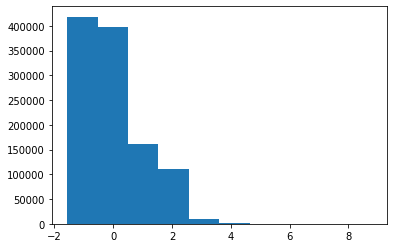

In [14]:
plt.hist(X[:,0])

In [15]:
idx = dt[:,-1]
bkg_idx = np.where(idx==0)[0]
signal_idx = np.where(idx==1)[0]

In [16]:
print(bkg_idx)

[      0       1       2 ... 1099997 1099998 1099999]


In [17]:
total_PureBkg = torch.tensor(X[bkg_idx])

total_PureBkg_selection = total_PureBkg

In [18]:
total_PureBkg_selection.shape

torch.Size([1000000, 94])

In [19]:
train_set, val_set = torch.utils.data.random_split(total_PureBkg_selection, [800000, 200000])

In [20]:
len(train_set)

800000

In [21]:
bs = 500
bkgAE_train_iterator = utils.DataLoader(total_PureBkg_selection, batch_size=bs, shuffle=True)
bkgAE_test_iterator = utils.DataLoader(total_PureBkg_selection, batch_size=bs)

In [22]:
class Encoder(nn.Module):
    ''' This the encoder part of VAE

    '''
    def __init__(self, z_dim):
        '''
        Args:
            input_dim: A integer indicating the size of input (in case of MNIST 28 * 28).
            hidden_dim: A integer indicating the size of hidden dimension.
            z_dim: A integer indicating the latent dimension.
        '''
        super().__init__()

        self.linear1 = nn.Linear(94, 47)
        self.linear2 = nn.Linear(47, 20)
        #self.linear3 = nn.Linear(70, 50)
        #self.linear4 = nn.Linear(50, 30)
        #self.linear5 = nn.Linear(60, 30)
        hidden_dim = 20
        self.mu = nn.Linear(hidden_dim, z_dim)
        self.var = nn.Linear(hidden_dim, z_dim)

    def forward(self, x):
        # x is of shape [batch_size, input_dim]
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        #x = F.leaky_relu(self.linear3(x))
        #x = F.leaky_relu(self.linear4(x))
        #x = F.leaky_relu(self.linear5(x))

        #hidden = F.relu(self.linear(x))
        # hidden is of shape [batch_size, hidden_dim]
        
        z_mu = self.mu(x)
        # z_mu is of shape [batch_size, latent_dim]
        z_var = self.var(x)
        # z_var is of shape [batch_size, latent_dim]

        return z_mu, z_var


In [23]:
class Decoder(nn.Module):
    ''' This the decoder part of VAE

    '''
    def __init__(self, z_dim):
        '''
        Args:
            z_dim: A integer indicating the latent size.
            hidden_dim: A integer indicating the size of hidden dimension.
            output_dim: A integer indicating the output dimension (in case of MNIST it is 28 * 28)
        '''
        super().__init__()

        self.linear1 = nn.Linear(z_dim, 20)
        self.linear2 = nn.Linear(20, 47)
        #self.linear3 = nn.Linear(50, 70)
        #self.linear4 = nn.Linear(70, 90)
        #self.linear5 = nn.Linear(100, 160)
        self.out = nn.Linear(47, 94)

    def forward(self, x):
        # x is of shape [batch_size, latent_dim]
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        #x = F.leaky_relu(self.linear3(x))
        #x = F.leaky_relu(self.linear4(x))
        #x = F.leaky_relu(self.linear5(x))

        #hidden = F.relu(self.linear(x))
        # hidden is of shape [batch_size, hidden_dim]

        predicted = torch.sigmoid(self.out(x))
        # predicted is of shape [batch_size, output_dim]

        return predicted


In [24]:
class VAE(nn.Module):
    ''' This the VAE, which takes a encoder and decoder.

    '''
    def __init__(self, enc, dec):
        super().__init__()

        self.enc = enc
        self.dec = dec

    def forward(self, x):
        # encode
        z_mu, z_var = self.enc(x)

        # sample from the distribution having latent parameters z_mu, z_var
        # reparameterize
        std = torch.exp(z_var / 2)
        eps = torch.randn_like(std)
        x_sample = eps.mul(std).add_(z_mu)

        # decode
        predicted = self.dec(x_sample)
        return predicted, z_mu, z_var


In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.get_device_name(0)

cuda:0


'GeForce RTX 2080 Ti'

In [26]:
# encoder
encoder = Encoder(4)

# decoder
decoder = Decoder(4)

# vae
model = VAE(encoder, decoder).to(device)

# optimizer
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr)

In [27]:
print(model)
print(device)

VAE(
  (enc): Encoder(
    (linear1): Linear(in_features=94, out_features=47, bias=True)
    (linear2): Linear(in_features=47, out_features=20, bias=True)
    (mu): Linear(in_features=20, out_features=4, bias=True)
    (var): Linear(in_features=20, out_features=4, bias=True)
  )
  (dec): Decoder(
    (linear1): Linear(in_features=4, out_features=20, bias=True)
    (linear2): Linear(in_features=20, out_features=47, bias=True)
    (out): Linear(in_features=47, out_features=94, bias=True)
  )
)
cuda:0


In [28]:
def train():
    # set the train mode
    model.train()

    # loss of the epoch
    train_loss = 0

    for i, x in enumerate(bkgAE_train_iterator):
        # reshape the data into [batch_size, 784]
        x = x.float().cuda()

        # update the gradients to zero
        optimizer.zero_grad()

        # forward pass
        x_sample, z_mu, z_var = model(x)

        # reconstruction loss
        recon_loss = F.binary_cross_entropy(x_sample, x, size_average=False)

        # kl divergence loss
        kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)

        # total loss
        loss = recon_loss + kl_loss

        # backward pass
        loss.backward()
        train_loss += loss.item()

        # update the weights
        optimizer.step()

    return train_loss


In [29]:
def test():
    # set the evaluation mode
    model.eval()

    # test loss for the data
    test_loss = 0

    # we don't need to track the gradients, since we are not updating the parameters during evaluation / testing
    with torch.no_grad():
        for i, x in enumerate(bkgAE_test_iterator):
            # reshape the data
            #x = x.view(-1, 28 * 28)
            x = x.float().cuda()
            # forward pass
            x_sample, z_mu, z_var = model(x)

            # reconstruction loss
            recon_loss = F.binary_cross_entropy(x_sample, x, size_average=False)

            # kl divergence loss
            kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)

            # total loss
            loss = recon_loss + kl_loss
            test_loss += loss.item()

    return test_loss

In [30]:
best_test_loss = float('inf')

for e in range(100):

    train_loss = train()
    test_loss = test()

    train_loss /= len(total_PureBkg_selection)
    test_loss /= len(total_PureBkg_selection)

    print(f'Epoch {e}, Train Loss: {train_loss:.2f}, Test Loss: {test_loss:.2f}')

    if best_test_loss > test_loss:
        best_test_loss = test_loss
        patience_counter = 1
        print("Saving model!")
        if mode == 'ROC':
            torch.save(model.state_dict(),"/data/t3home000/spark/QUASAR/weights/bkg_vae_Vanilla_RND_moretaus.h5")
        else:
            torch.save(model.state_dict(), "/data/t3home000/spark/QUASAR/weights/bkg_vae_Vanilla_PureBkg.h5")
    else:
        patience_counter += 1
        print("Not saving model!")

    if patience_counter > 20:
        print("Patience Limit Reached")
        break

/home/spark/miniconda3/envs/myenv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 0, Train Loss: 3.03, Test Loss: -27.06
Saving model!
Epoch 1, Train Loss: -35.18, Test Loss: -42.70
Saving model!
Epoch 2, Train Loss: -51.07, Test Loss: -55.81
Saving model!
Epoch 3, Train Loss: -50.63, Test Loss: -46.72
Not saving model!
Epoch 4, Train Loss: -49.48, Test Loss: -53.27
Not saving model!
Epoch 5, Train Loss: -58.12, Test Loss: -63.90
Saving model!
Epoch 6, Train Loss: -65.77, Test Loss: -66.63
Saving model!
Epoch 7, Train Loss: -66.73, Test Loss: -66.71
Saving model!
Epoch 8, Train Loss: -66.29, Test Loss: -65.75
Not saving model!
Epoch 9, Train Loss: -65.16, Test Loss: -64.56
Not saving model!
Epoch 10, Train Loss: -63.62, Test Loss: -62.90
Not saving model!
Epoch 11, Train Loss: -62.07, Test Loss: -61.56
Not saving model!
Epoch 12, Train Loss: -60.62, Test Loss: -59.58
Not saving model!
Epoch 13, Train Loss: -59.14, Test Loss: -58.22
Not saving model!
Epoch 14, Train Loss: -57.44, Test Loss: -56.67
Not saving model!
Epoch 15, Train Loss: -55.81, Test Loss: -55.1

In [31]:
print(mode)

ROC


In [32]:
model.load_state_dict(torch.load("/data/t3home000/spark/QUASAR/weights/bkg_vae_Vanilla_RND_moretaus.h5"))

<All keys matched successfully>

In [33]:
def get_loss(dt):
    print(dt.shape)
    
    #for i in index_list:
    #    print(i)
    #    dt[:,i] = (dt[:,i]-np.mean(dt[:,i]))/np.std(dt[:,i])
  
    
    total_in = torch.tensor(dt)
    #total_in_train_x_1 = total_in.t()[0:6].t()
    #total_in_train_x_3 = total_in.t()[7:13].t()
    total_in_selection = total_in
    #z_mu, z_var  = model.enc(total_in_selection.float().cuda())
    #x_sample, z_mu, z_var = model(total_in_selection.float().cuda())
    #std = torch.exp(z_var / 2)
    #eps = torch.randn_like(std)
    #x_sample = eps.mul(std).add_(z_mu)
    #decoded_bkg = model.dec(x_sample)
    #recon_loss = np.zeros(len(dt),dtype=np.float)
    #for i in range(len(dt)):
    #    recon_loss[i] = F.binary_cross_entropy(x_sample[i].float().cuda(), total_in_selection[i].float().cuda(), size_average=False).data.cpu().numpy()
    
    #loss_bkg = torch.mean((x_sample.float().cuda()-total_in_selection.float().cuda())**2,dim=1).data.cpu().numpy()


    
    with torch.no_grad():
         #reconstruction loss
        #x_sample, z_mu, z_var = model(total_in_selection.float().cuda())
        #recon_loss = F.binary_cross_entropy(x_sample, total_in_selection.float().cuda(), size_average=False, reduce=None)
        

        #kl divergence loss
        #kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)

        #total loss
        #loss = recon_loss + kl_loss
        loss = torch.mean((model(total_in_selection.float().cuda())[0]- total_in_selection.float().cuda())**2,dim=1).data.cpu().numpy()
    
    return loss

In [34]:
X[signal_idx].shape

(100000, 94)

In [35]:
loss_bkg = get_loss(X[bkg_idx])
loss_sig = get_loss(X[signal_idx])

(1000000, 94)
(100000, 94)


In [36]:
loss_sig

array([0.00739145, 0.02755089, 0.01599835, ..., 0.03204853, 0.03572318,
       0.01886648], dtype=float32)

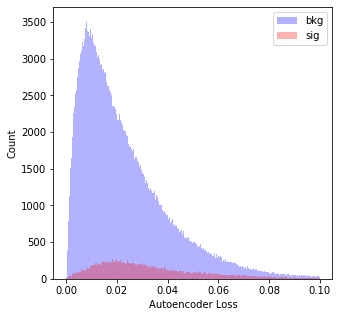

In [39]:
plt.rcParams["figure.figsize"] = (5,5)

bins = np.linspace(0,0.1,1000)
plt.hist(loss_bkg,bins=bins,alpha=0.3,color='b',label='bkg');
plt.hist(loss_sig,bins=bins,alpha=0.3,color='r',label='sig');
plt.xlabel(r'Autoencoder Loss')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

### ROC


In [40]:
def get_tpr_fpr(sigloss,bkgloss,aetype='bkg'):
    bins = np.linspace(0,50,1001)
    tpr = []
    fpr = []
    for cut in bins:
        if aetype == 'sig':
            tpr.append(np.where(sigloss<cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss<cut)[0].shape[0]/len(bkgloss))
        if aetype == 'bkg':
            tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss>cut)[0].shape[0]/len(bkgloss))
    return tpr,fpr  

In [41]:
tpr, fpr = get_tpr_fpr(loss_sig,loss_bkg)

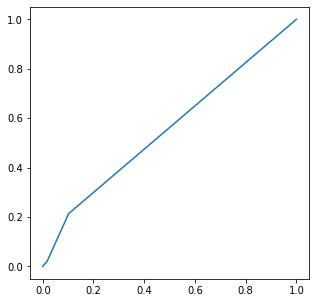

In [42]:
plt.plot(fpr,tpr)

In [55]:
np.save('VanillaVAE_40var_sigloss.npy',loss_sig)
np.save('VanillaVAE_40var_bkgloss.npy',loss_bkg)

### PRECISION - RECALL

In [61]:
def get_precision_recall(sigloss,bkgloss,aetype='bkg'):
    bins = np.linspace(0,2,1001)
    tpr = []
    fpr = []
    precision = []
    for cut in bins:
        if aetype == 'sig':
            tpr.append(np.where(sigloss<cut)[0].shape[0]/len(sigloss))
            precision.append((np.where(sigloss<cut)[0].shape[0])/(np.where(bkgloss<cut)[0].shape[0]+np.where(sigloss<cut)[0].shape[0]))
            
        if aetype == 'bkg':
            tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
            precision.append((np.where(sigloss>cut)[0].shape[0])/(np.where(bkgloss>cut)[0].shape[0]+np.where(sigloss>cut)[0].shape[0]))
    return precision,tpr      

In [62]:
prec, rec = get_precision_recall(loss_sig,loss_bkg)

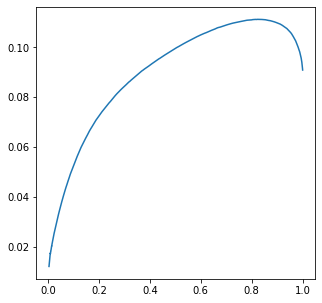

In [65]:
plt.plot(rec,prec)

In [ ]:
jnm